In [6]:
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Пример 1
  
Первый пример служит скорее для оценки времени работы алгоритма
  
Здесь признаками являются просто случайно сгенерированные числа, а таргетом сумма первого, второго, последнего и предполсднего признаков

In [7]:
X_train = np.random.randint(0, 1000,(10000, 20))
Y_train = X_train[:,-1]+X_train[:,-2]+ X_train[:,0] + X_train[:,1]
X_test = np.random.randint(0, 1000, (100, 20))
Y_test = X_test[:,-1]+X_test[:,-2] + X_test[:,0] + X_test[:,1]

In [8]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [9]:
from RandomForest import RandomForestRegressor
model = RandomForestRegressor(max_depth=15, n_estimators=20, max_features=X_train.shape[1]//3)

model.fit(scaled_X_train, Y_train)

100%|██████████| 20/20 [00:46<00:00,  2.31s/it]


In [10]:
from sklearn.metrics import mean_absolute_error as mae
prediction = model.predict(scaled_X_test)
mae(Y_test, prediction)

124.927013897315

Видим, что модель успешно уловила все тренды. средняя относительная ошибка составляет примерно $\frac{124.92}{2000} \approx 0.062$

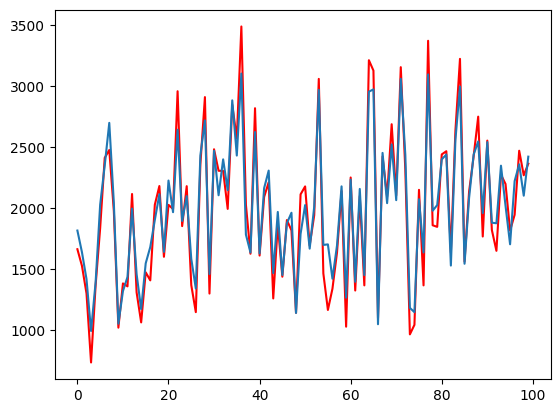

In [11]:
import matplotlib.pyplot as plt
plt.plot(Y_test[:100], color = "red")
plt.plot(prediction[:100])

# Пример 2
  
Теперь попробуй протестировать модель на реальном датасете содержащем данные о домах в различных районах Калифорнии  

In [12]:
from sklearn.datasets import fetch_california_housing
from RandomForest import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

data = fetch_california_housing()
X, y = data['data'], data['target']

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25)
scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


In [14]:
model = RandomForestRegressor(max_depth=20, n_estimators=100, max_features=X_train.shape[1]//3, min_inform_gain=1)
model.fit(scaled_X_train, Y_train)

100%|██████████| 100/100 [03:01<00:00,  1.82s/it]


Моя модель показывает ту же среднюю абсолютную ошибку, что и модель из sklearn  
Средняя относительная ошибка составляет примерно $\frac{0.347}{5 - 0.15} \approx 0.071$

In [15]:
from sklearn.metrics import mean_absolute_error as mae
prediction = model.predict(scaled_X_test)  
print(mae(Y_test, prediction))

0.34767961003581627


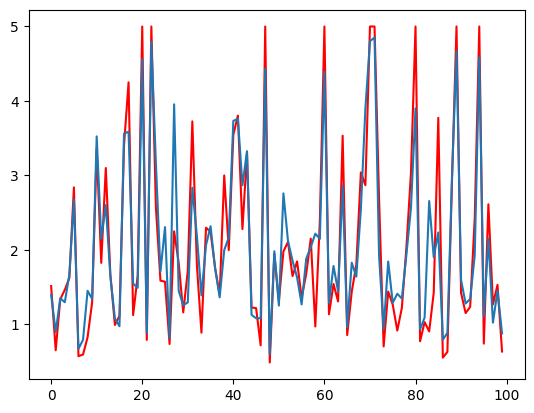

In [16]:
import matplotlib.pyplot as plt
plt.plot(Y_test[:100], color = "red")
plt.plot(prediction[:100])

Модель увы проигрывает в скорости sklearn. Возможно следует использовать гистограмный метод, однако наверняка он даст снижение в точности